## Toy example: list sum

### Setup environment


In [2]:
# requirements
import random
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook+plotly_mimetype+svg"

### Construct a list of integers


In [3]:
# a list of integers from 1 to 10000 with random order
items = list(range(10000))
random.shuffle(items)

### Sum of the list elements


In [4]:
# vanilla Python
t1 = %timeit -r 5 -n 50 -q -o sum(items)

In [5]:
# Numpy version
array = np.array(items)
t2 = %timeit -r 5 -n 50 -q -o array.sum()

### Which one is faster ?


In [6]:
# vanilla Python time
t1

<TimeitResult : 94.9 µs ± 23.4 µs per loop (mean ± std. dev. of 5 runs, 50 loops each)>

In [7]:
# Numpy version time
t2

<TimeitResult : 9.65 µs ± 11.7 µs per loop (mean ± std. dev. of 5 runs, 50 loops each)>

## WHY ?

- **List** elements **not contiguous** in memory: loading elements from memory to CPU cache individually
- **Numpy array** elements **contiguous** in memory: loading elements from memory to CPU cache by batch

![](figs/array_vs_list.png)
Credit: [Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)

## Benchmark list sum vs numpy array sum


In [8]:
def benchmark1(N):
    print(f"sum of {N} elements")
    items = list(range(N))
    random.shuffle(items)
    # vanilla Python
    t1 = %timeit -r 5 -n 20 -q -o sum(items)
    # Numpy version
    array = np.array(items)
    t2 = %timeit -r 5 -n 20 -q -o array.sum()
    # output
    return t1.average, t2.average

### Checking increasing list size


In [9]:
list_size = np.trunc(10**np.arange(2, 7, 0.2)).astype(int)

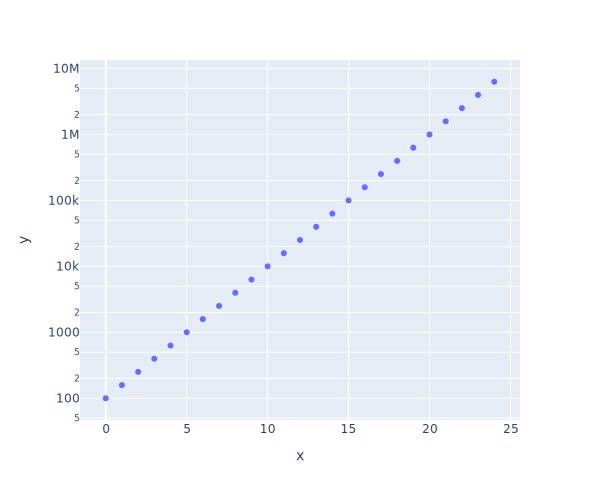

In [10]:
# check the list size candidates
fig = px.scatter(y=list_size, log_y=True, width=600)
fig.show()

### Run the benchmark


In [11]:
# run the benchmark
res = []

for N in list_size:
    
    time_res = benchmark1(N)
    
    res.append({
        'N': N,
        'vanilla': time_res[0],
        'numpy': time_res[1]
    })

sum of 100 elements
sum of 158 elements
sum of 251 elements
sum of 398 elements
sum of 630 elements
sum of 1000 elements
sum of 1584 elements
sum of 2511 elements
sum of 3981 elements
sum of 6309 elements
sum of 10000 elements
sum of 15848 elements
sum of 25118 elements
sum of 39810 elements
sum of 63095 elements


sum of 100000 elements
sum of 158489 elements


sum of 251188 elements


sum of 398107 elements


sum of 630957 elements


sum of 1000000 elements


sum of 1584893 elements


sum of 2511886 elements


sum of 3981071 elements


sum of 6309573 elements


### Results


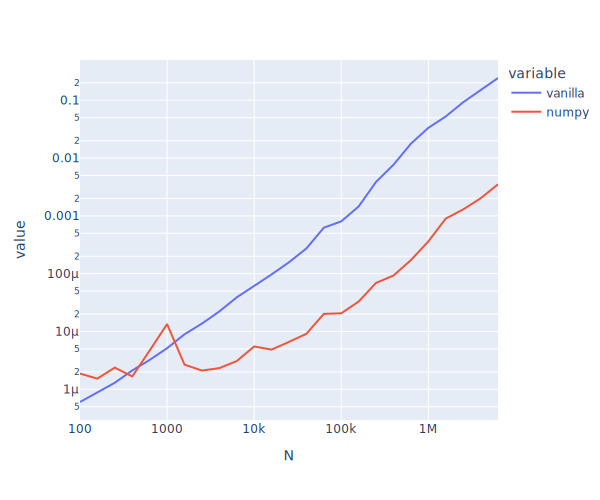

In [12]:
df_res = pd.DataFrame(res)
px.line(df_res, x='N', y=['vanilla', 'numpy'], log_y=True, log_x=True, width=600)

## Benchmark cache effect on numpy array sum


In [13]:
def benchmark2(N):
    print(f"sum of {N} elements")
    items = list(range(N))
    random.shuffle(items)
    # Numpy version
    array = np.array(items)
    t1 = %timeit -r 5 -n 10 -q -o array.sum()
    # output
    return t1.average

### Checking increasing list size

### Run the benchmark


In [14]:
# run the benchmark
res = []

for N in list_size:
    
    time_res = benchmark2(N)
    
    res.append({
        'N': N,
        'numpy': time_res
    })

sum of 100 elements
sum of 158 elements
sum of 251 elements
sum of 398 elements
sum of 630 elements
sum of 1000 elements
sum of 1584 elements
sum of 2511 elements
sum of 3981 elements
sum of 6309 elements
sum of 10000 elements
sum of 15848 elements
sum of 25118 elements
sum of 39810 elements
sum of 63095 elements
sum of 100000 elements
sum of 158489 elements
sum of 251188 elements


sum of 398107 elements
sum of 630957 elements


sum of 1000000 elements


sum of 1584893 elements


sum of 2511886 elements


sum of 3981071 elements


sum of 6309573 elements


### Results


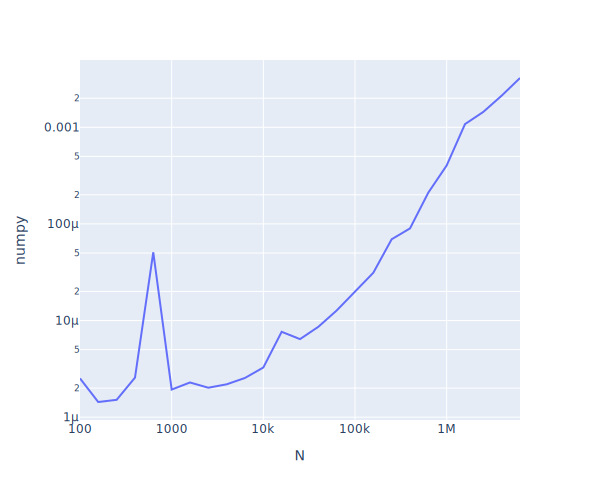

In [15]:
df_res2 = pd.DataFrame(res)
px.line(df_res2, x='N', y='numpy', log_y=True, log_x=True, width=600)